In [54]:
import pandas as pd

df = pd.read_csv("us-counties.csv")
is_not_null = pd.notnull(df['fips'])
final_df = df[is_not_null]
final_df['date'] = pd.to_datetime(final_df.date)
final_df.head()

C:\Users\ravglk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [73]:
final_df.date.dt.weekday_name

0          Tuesday
1        Wednesday
2         Thursday
3           Friday
4           Friday
           ...    
30838       Friday
30839       Friday
30840       Friday
30841       Friday
30842       Friday
Name: date, Length: 30388, dtype: object

In [33]:
final_df.date.isnull().sum()

0

In [56]:
final_df.dtypes

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths             int64
dtype: object

In [57]:
final_df['date'].dtype.kind

'M'

Text(0, 0.5, 'cases')

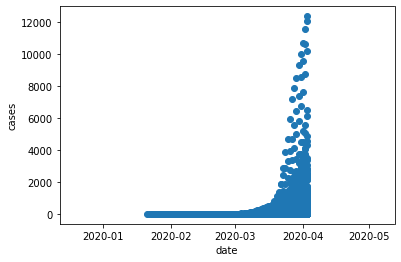

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(final_df['date'], final_df['cases'])
plt.xlabel('date')
plt.ylabel('cases')

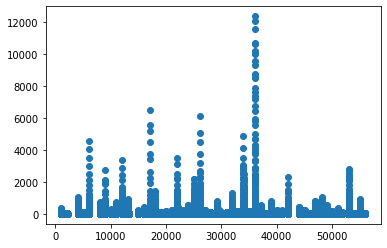

In [62]:
plt.scatter(df['fips'], df['cases'])

In [63]:
x = final_df[['date', 'fips']]
y = final_df['cases']

In [64]:
x

,date,fips
0,2020-01-21,53061.0
1,2020-01-22,53061.0
2,2020-01-23,53061.0
3,2020-01-24,17031.0
4,2020-01-24,53061.0
...,...,...
30838,2020-04-03,56035.0
30839,2020-04-03,56037.0
30840,2020-04-03,56039.0
30841,2020-04-03,56041.0


In [65]:
y

0         1
1         1
2         1
3         1
4         1
         ..
30838     1
30839     3
30840    32
30841     1
30842     2
Name: cases, Length: 30388, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [67]:
len(x_train)

24310

In [68]:
len(x_test)

6078

In [69]:
x_train

,date,fips
1422,2020-03-12,12101.0
21695,2020-03-30,53039.0
28488,2020-04-03,1005.0
28850,2020-04-03,13071.0
26947,2020-04-02,20189.0
...,...,...
28440,2020-04-02,55057.0
18011,2020-03-29,12121.0
29638,2020-04-03,28117.0
7409,2020-03-22,17195.0


In [70]:
y_train

1422       1
21695      7
28488      1
28850     44
26947      1
        ... 
28440      4
18011      2
29638      9
7409       1
17956    280
Name: cases, Length: 24310, dtype: int64

In [71]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [51]:
clf.fit(x_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'